# Описательная статистика и построение графиков при помощи Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Типы данных

In [3]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Размер датафрейма

In [4]:
df.shape

(500, 9)

Выясним, есть ли пустые значения

In [5]:
cols = list(df.columns)
#cols.remove('Unnamed: 0')
#При выполнении кода, который стал комментарием, вылезла ошибка 'ValueError: list.remove('Unnamed: 0'): x not in list', а значит X не найден 
cols

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [6]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'Serial No.': 0,
 'GRE Score': 0,
 'TOEFL Score': 0,
 'University Rating': 0,
 'SOP': 0,
 'LOR ': 0,
 'CGPA': 0,
 'Research': 0,
 'Chance of Admit ': 0}

Пустых ячеек нет

1. Посмотрим, в какой университет из предложанных пяти больше всего стремятся попасть абитуриенты

In [7]:
import matplotlib.pyplot as plt

<AxesSubplot:>

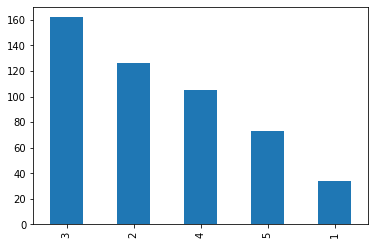

In [8]:
df['University Rating'].value_counts().plot(kind = 'bar')

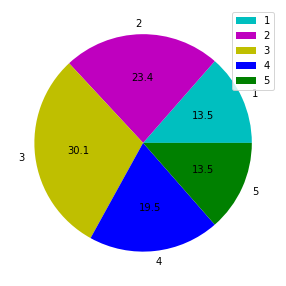

In [60]:
first = df[df['University Rating'] == 1].shape[0]
second = df[df['University Rating'] == 2].shape[0]
third = first = df[df['University Rating'] == 3].shape[0]
fourth = first = df[df['University Rating'] == 4].shape[0]
fifth = first = df[df['University Rating'] == 5].shape[0]
uni_pie = pd.DataFrame({"": [first, second, third, fourth, fifth]},
                       index=["1", "2", '3', '4', '5'])
uni_pie.plot.pie(y="",
                 colors=["c", "m", 'y', 'b', 'g'],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

Из графиков видно, что больше всего заявлений было подано в университет, занимающий третье место в рейтинге. Это может быть связано с тем, что абитуриенты боятся подаваться в вуз, занимающий первое место, или сомневаются в своих шансах, но и не хотят попадаться в университеты,  занимающие последнюю строчку рейтинга. 

2. Сравним средний балл аттестата абитуриентов с научно-исследовательским опытом и без

In [9]:
res = df[df['Research'] == 1]
res['CGPA'].mean() #Средний балл школьников с опытом в научных исследованиях

8.844928571428571

In [10]:
res_0 = df[df['Research'] == 0]
res_0['CGPA'].mean() #Средний балл школьников без опытов в научных исследованиях

8.234727272727271

Можно сделать вывод о том, что в среднем ученики, которые занимаются научными исследованиями, получают более высокие оценки в школе

3. Посмотрим, как меняются шансы на поступление в зависимости от университета

In [11]:
for i in [1,2,3,4,5]:
    rate = df[df['University Rating'] == i]
    a = rate['Chance of Admit '].mean()
    print('Unversity Ranking is ' + str(i) + '. Mean chance of admit is '+ str(a))

Unversity Ranking is 1. Mean chance of admit is 0.5620588235294117
Unversity Ranking is 2. Mean chance of admit is 0.6261111111111112
Unversity Ranking is 3. Mean chance of admit is 0.7029012345679012
Unversity Ranking is 4. Mean chance of admit is 0.8016190476190477
Unversity Ranking is 5. Mean chance of admit is 0.8880821917808219


Как видно, чем ниже университет в рейтинге, тем выше шансы в него поступить

4. Узнаем какой средний балл у абитуриентов за экзамен TOEFL по каждому университету

In [26]:
language = df.groupby('University Rating')['TOEFL Score'].mean()
language

University Rating
1    100.205882
2    103.444444
3    106.314815
4    110.961905
5    113.438356
Name: TOEFL Score, dtype: float64

<AxesSubplot:xlabel='University Rating'>

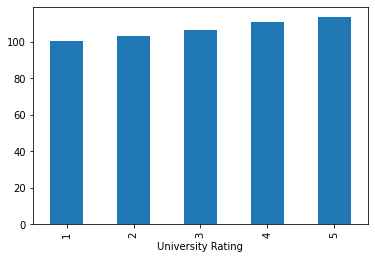

In [27]:
language.plot(kind='bar')

Из графика видно, что самый высокий средний балл у университета, занимающего 5 место в рейтинге

5. Посмотрим, какое соотношение абитуриентов с научно-исследовательским опытом и без в каждом униврситете

<AxesSubplot:xlabel='University Rating'>

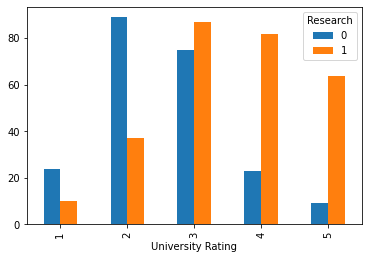

In [38]:
res = pd.crosstab(df['University Rating'], df['Research'])
res.plot(kind='bar')

По графику видно, что минимальный разрыв в соотношении абитуриентов в университете, занимащим третье место  в рейтинге. Также, туда подали заявления больше всего школьников с опытом в научных исследованиях

6. Сравним средний балл за экзамен GRE по каждому университету

<AxesSubplot:xlabel='University Rating'>

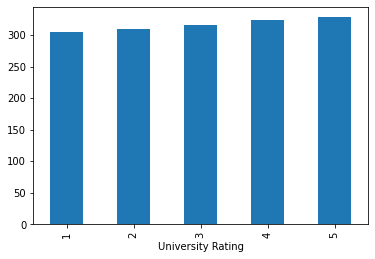

In [41]:
GRE = df.groupby('University Rating')['GRE Score'].mean()
GRE.plot(kind='bar')

В университет, занимающий пятое место в рейтинге, подают заявления абитуриенты, у которых в среднем самый высокий средний балл за экзамен GRE

7. Узнаем такие показатели как среднее значение, минимум и максимум у столбцов SOP, LOR, CGPA (их значения примерно в одном диапазоне, поэтому boxplot получится более точным, нежели если будем сравнивать значение от 0 до 10 (у CGPA) с результатами экзамена GRE)

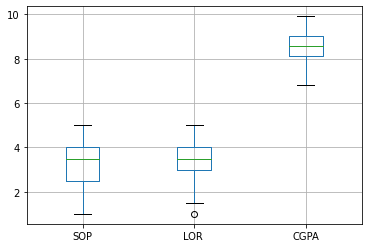

In [69]:
boxplot = df.boxplot(column=['SOP', 'LOR ', 'CGPA'])

Как видно, в среднем оценка за рекомендательное письмо и за заявление о намерениях фактически одинаковое среди всех абитуриентов. 
Разброс среднего балла атестата и оценки за рекомендательное писмьо меньше чем у заявления о намерениях.

8. Каков процент абитуриентов с высоким шансом на поступление (>=90%)?

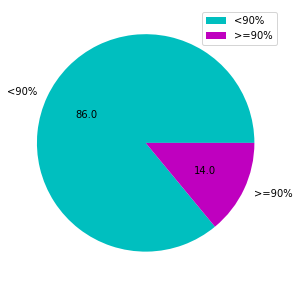

In [84]:
less = df[df['Chance of Admit '] < 0.9].shape[0]
more = df[df['Chance of Admit '] >= 0.9].shape[0]
uni_pie = pd.DataFrame({"": [less, more]},
                       index=["<90%", ">=90%"])
uni_pie.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

Процент абитуриентов с высоким шансом на поступление низкий  - 14%. 

9. Сколько абитуриентов больше: с опытом в исследовательской деятельности или без него?

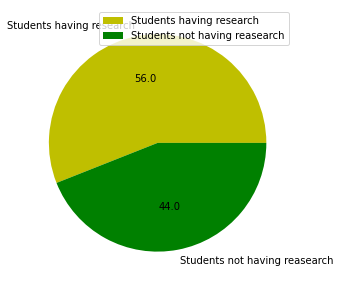

In [88]:
rs = df[df['Research'] == 1].shape[0]
no_rs = df[df['Research'] == 0].shape[0]
uni_pie = pd.DataFrame({"": [rs, no_rs]},
                       index=["Students having research", 'Students not having reasearch'])
uni_pie.plot.pie(y="",
                 colors=["y", "g"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

Абитуриентов с опытом в исследованиях больше тех, у кого его нет, на 12%

10. Получили ли абитуренты с опытом в исследованиях больше баллов за экзамены TOEFL и GRE?

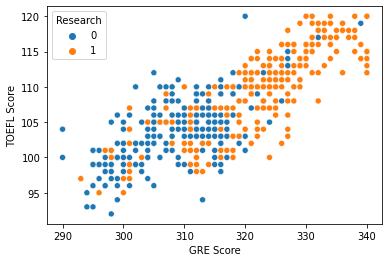

In [99]:
import seaborn as sns
sns.scatterplot(data=df,x='GRE Score',y='TOEFL Score',hue='Research')
plt.show()

Получается, что большинство школьники, которые получили высокие баллы за экмены TOEFL и GRE, имеют опыт в исследованиях